In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
eps=np.finfo(float).eps

In [2]:
cos=lambda x: np.cos(x)
sin=lambda x: np.sin(x)
arr_me=lambda x: np.array(x)

def get_stokes(df, index):
    I=df['power[w]'][index]; p=df['dop'][index]
    psi=df['azimuthal[rad]'][index]; phi=df['ellipticity[rad]'][index]
    if np.abs(p)>1:
      p=p/np.abs(p)
    if p<0:
      p=0
    s0=I
    s1=p*cos(2*psi)*cos(2*phi)
    s2=p*sin(2*psi)*cos(2*phi)
    s3=p*sin(2*phi)
    return s0, s1, s2, s3

In [3]:
d0=[]
d0.append(pd.read_csv('026525_ring_horizontal.csv'))
d0.append(pd.read_csv('026525_ring_vertical.csv'))
d0.append(pd.read_csv('026525_ring_pos_45.csv'))
d0.append(pd.read_csv('026525_ring_neg_45.csv'))
d0.append(pd.read_csv('026525_ring_rcp.csv'))
d0.append(pd.read_csv('026525_ring_lcp.csv'))

dd=[]
dd.append(pd.read_csv('020425_ring_horizontal.csv'))
dd.append(pd.read_csv('020425_ring_vertical.csv'))
dd.append(pd.read_csv('020425_ring_pos_45.csv'))
dd.append(pd.read_csv('020425_ring_neg_45.csv'))
dd.append(pd.read_csv('020425_ring_rcp.csv'))
dd.append(pd.read_csv('020425_ring_lcp.csv'))

/var/folders/mh/wm6cwwps69xbphrgc6m4nt380000gn/T/ipykernel_83440/1789007402.py:15: RuntimeWarning: invalid value encountered in log
  a[i,j].pcolormesh(np.log(So[j,:,:,i]+eps),cmap='magma')


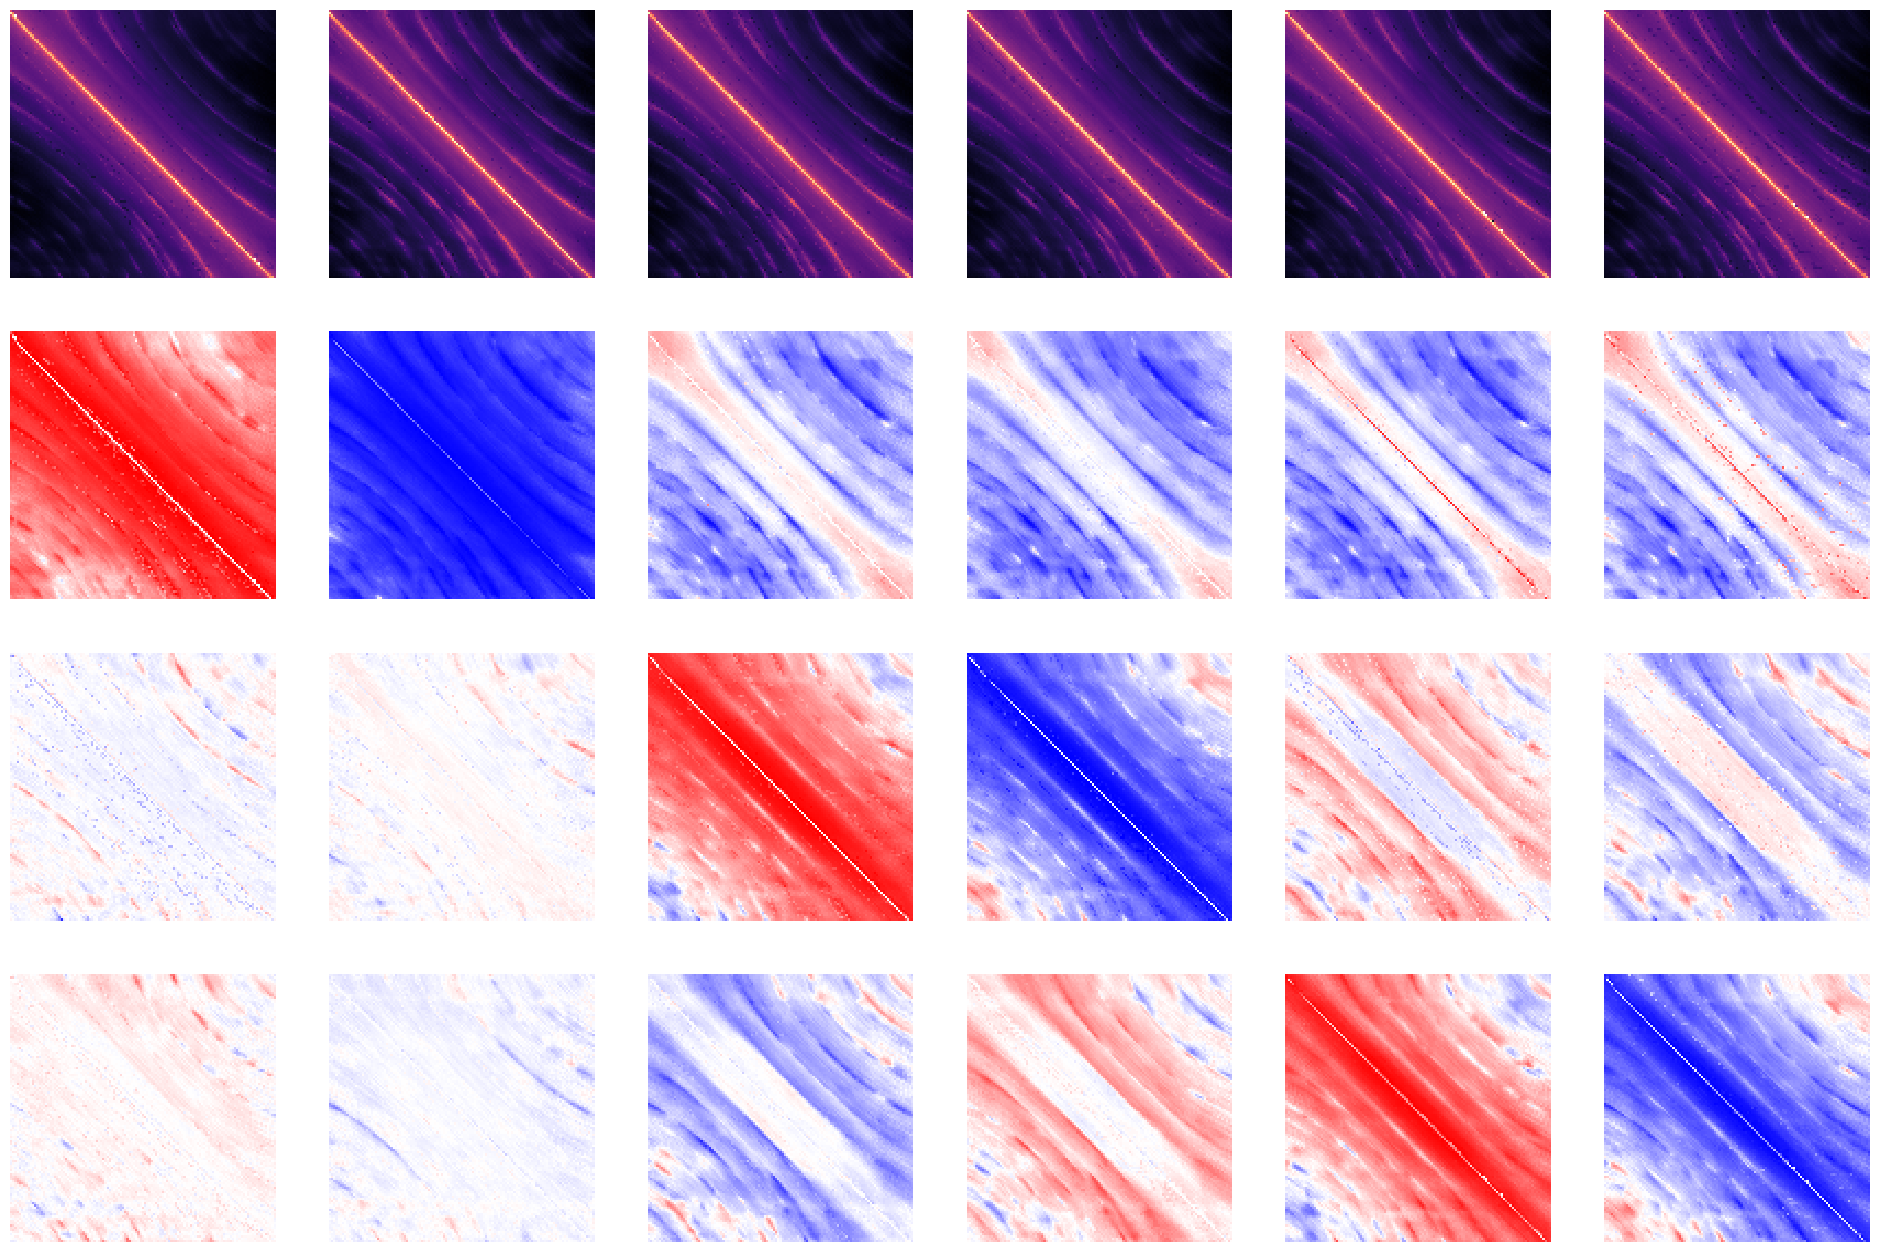

/var/folders/mh/wm6cwwps69xbphrgc6m4nt380000gn/T/ipykernel_83440/1789007402.py:24: RuntimeWarning: invalid value encountered in log
  a[i,j].pcolormesh(np.log(Sd[j,:,:,i]+eps),cmap='magma')


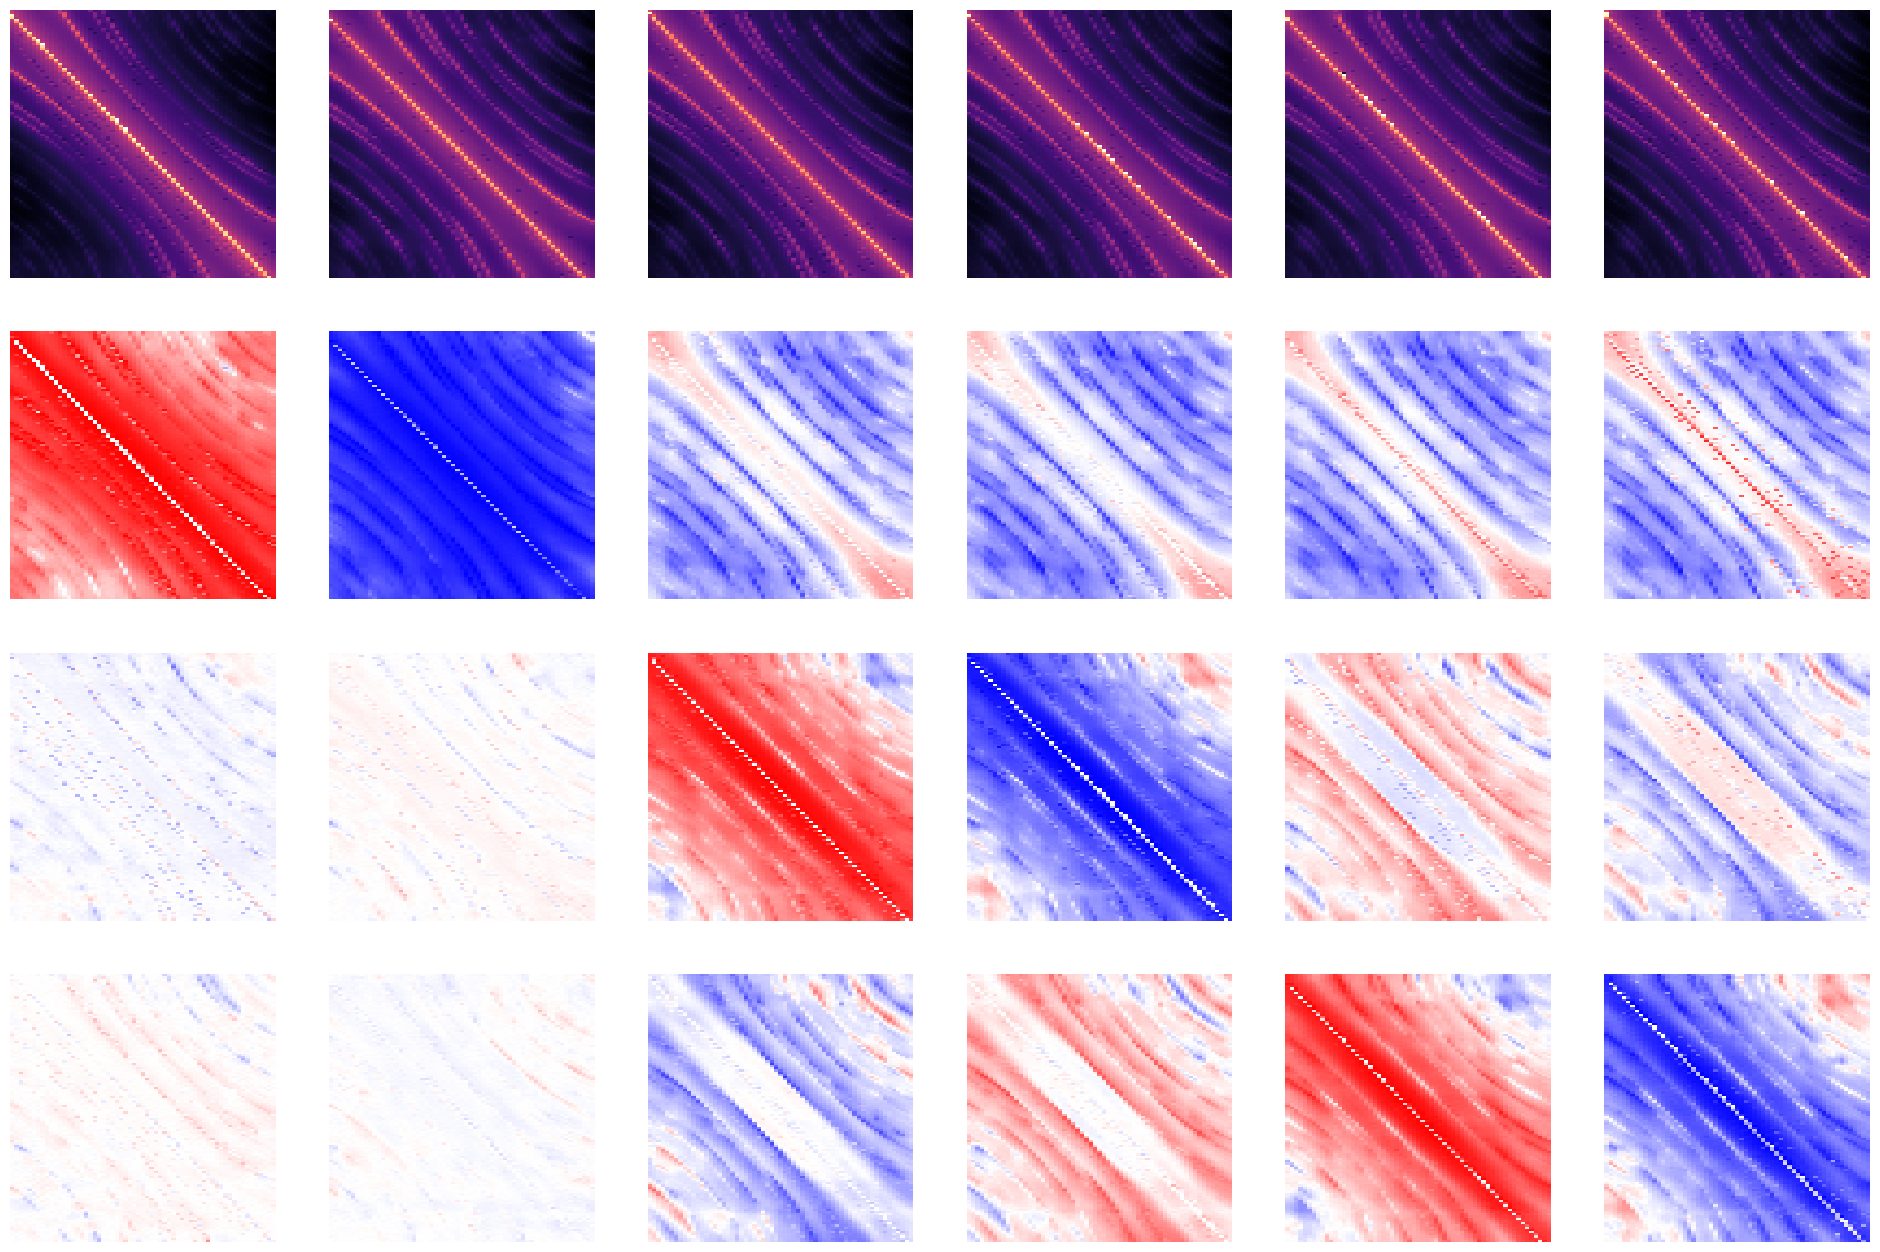

In [4]:
So=np.zeros((6,121,121,4))
for p in range(6):
  for i in range(121):
    for j in range(121):
      So[p,i,j]=get_stokes(d0[p],121*i+j)
Sd=np.zeros((6,121,61,4))
for p in range(6):
  for i in range(121):
    for j in range(61):
      Sd[p,i,j]=get_stokes(dd[p],61*i+j)
f,a=plt.subplots(4,6,figsize=(24,16))
for j in range(6):
  for i in range(4):
    if i==0:
      a[i,j].pcolormesh(np.log(So[j,:,:,i]+eps),cmap='magma')
    else:
      a[i,j].pcolormesh(So[j,:,:,i],cmap='bwr',vmin=-1,vmax=1)
    a[i,j].axis('off')
plt.show()
f,a=plt.subplots(4,6,figsize=(24,16))
for j in range(6):
  for i in range(4):
    if i==0:
      a[i,j].pcolormesh(np.log(Sd[j,:,:,i]+eps),cmap='magma')
    else:
      a[i,j].pcolormesh(Sd[j,:,:,i],cmap='bwr',vmin=-1,vmax=1)
    a[i,j].axis('off')
plt.show()

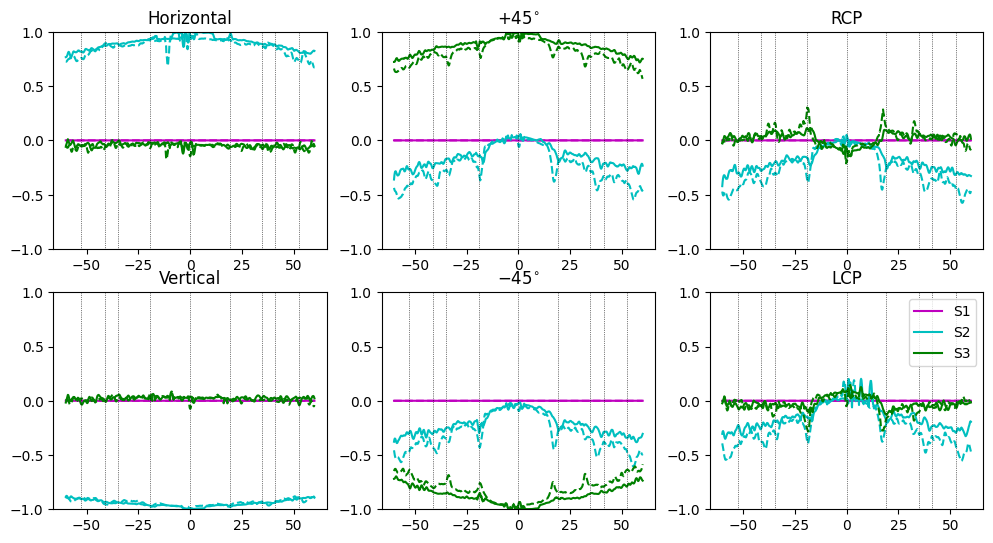

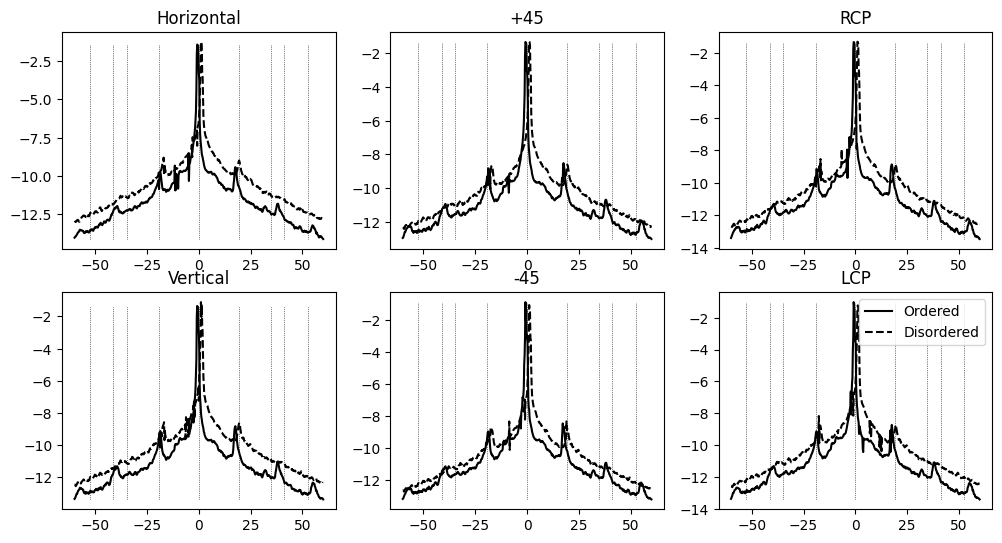

In [5]:
h_n=pd.read_csv('022525_ring_horizontal.csv')
v_n=pd.read_csv('022525_ring_vertical.csv')
p_n=pd.read_csv('022525_ring_pos_45.csv')
n_n=pd.read_csv('022525_ring_neg_45.csv')
r_n=pd.read_csv('022525_ring_rcp.csv')
l_n=pd.read_csv('022525_ring_lcp.csv')

Ho=np.zeros((601,4))
Vo=np.zeros((601,4))
Po=np.zeros((601,4))
No=np.zeros((601,4))
Ro=np.zeros((601,4))
Lo=np.zeros((601,4))

for i in range(601):
  Ho[i]=get_stokes(h_n,i)
  Vo[i]=get_stokes(v_n,i)
  Po[i]=get_stokes(p_n,i)
  No[i]=get_stokes(n_n,i)
  Ro[i]=get_stokes(r_n,i)
  Lo[i]=get_stokes(l_n,i)

dh_n=pd.read_csv('030725_ring_horizontal.csv')
dv_n=pd.read_csv('030725_ring_vertical.csv')
dp_n=pd.read_csv('030725_ring_pos_45.csv')
dn_n=pd.read_csv('030725_ring_neg_45.csv')
dr_n=pd.read_csv('030725_ring_rcp.csv')
dl_n=pd.read_csv('030725_ring_lcp.csv')

dHo=np.zeros((601,4))
dVo=np.zeros((601,4))
dPo=np.zeros((601,4))
dNo=np.zeros((601,4))
dRo=np.zeros((601,4))
dLo=np.zeros((601,4))

for i in range(601):
  dHo[i]=get_stokes(dh_n,i)
  dVo[i]=get_stokes(dv_n,i)
  dPo[i]=get_stokes(dp_n,i)
  dNo[i]=get_stokes(dn_n,i)
  dRo[i]=get_stokes(dr_n,i)
  dLo[i]=get_stokes(dl_n,i)

f,a=plt.subplots(2,3,figsize=(12,6.2))
csd=['--m','--c','--g']
cs=['m','c','g']
Sname=['S1','S2','S3']
for i in range(3):
  a[0,0].plot(np.linspace(-60,60,601),savgol_filter(Ho[:,i],10,3),csd[i])
  a[1,0].plot(np.linspace(-60,60,601),savgol_filter(Vo[:,i],10,3),csd[i])
  a[0,1].plot(np.linspace(-60,60,601),savgol_filter(Po[:,i],10,3),csd[i])
  a[1,1].plot(np.linspace(-60,60,601),savgol_filter(No[:,i],10,3),csd[i])
  a[0,2].plot(np.linspace(-60,60,601),savgol_filter(Ro[:,i],10,3),csd[i])
  a[1,2].plot(np.linspace(-60,60,601),savgol_filter(Lo[:,i],10,3),csd[i])
  a[0,0].plot(np.linspace(-60,60,601),savgol_filter(dHo[:,i],10,3),cs[i],label=Sname[i])
  a[1,0].plot(np.linspace(-60,60,601),savgol_filter(dVo[:,i],10,3),cs[i],label=Sname[i])
  a[0,1].plot(np.linspace(-60,60,601),savgol_filter(dPo[:,i],10,3),cs[i],label=Sname[i])
  a[1,1].plot(np.linspace(-60,60,601),savgol_filter(dNo[:,i],10,3),cs[i],label=Sname[i])
  a[0,2].plot(np.linspace(-60,60,601),savgol_filter(dRo[:,i],10,3),cs[i],label=Sname[i])
  a[1,2].plot(np.linspace(-60,60,601),savgol_filter(dLo[:,i],10,3),cs[i],label=Sname[i])
m,n=0,0
for i in range(6):
  a[n,m].plot(0*np.ones(10),np.linspace(-1,1,10),':k',linewidth=.5)
  a[n,m].plot(19.13*np.ones(10),np.linspace(-1,1,10),':k',linewidth=.5)
  a[n,m].plot(-19.13*np.ones(10),np.linspace(-1,1,10),':k',linewidth=.5)
  a[n,m].plot(34.78*np.ones(10),np.linspace(-1,1,10),':k',linewidth=.5)
  a[n,m].plot(-34.78*np.ones(10),np.linspace(-1,1,10),':k',linewidth=.5)
  a[n,m].plot(41.2*np.ones(10),np.linspace(-1,1,10),':k',linewidth=.5)
  a[n,m].plot(-41.2*np.ones(10),np.linspace(-1,1,10),':k',linewidth=.5)
  a[n,m].plot(52.57*np.ones(10),np.linspace(-1,1,10),':k',linewidth=.5)
  a[n,m].plot(-52.57*np.ones(10),np.linspace(-1,1,10),':k',linewidth=.5)
  m+=1
  if m==3:
    m=0
    n=1
a[0,0].set_title('Horizontal')
a[1,0].set_title('Vertical')
a[0,1].set_title('$+45^{\\circ}$')
a[1,1].set_title('$-45^{\\circ}$')
a[0,2].set_title('RCP')
a[1,2].set_title('LCP')
a[1,2].legend(loc='upper right')
for m in range(2):
  for n in range(3):
    a[m,n].set_ylim(-1,1)
plt.show()


hstokes=[Ho,Vo,Po,No,Ro,Lo]
dstokes=[dHo,dVo,dPo,dNo,dRo,dLo]
f,a=plt.subplots(2,3,figsize=(12,6.2))
pols=('Horizontal','Vertical','+45','-45','RCP','LCP')
m=0;n=0;
inds=[0,2,4,1,3,5]
for j in range(6):

  a[n,m].plot(np.linspace(-60,60,601),np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0])),'k',label='Ordered')
  a[n,m].plot(np.linspace(-60,60,601),np.log(dstokes[j][:,0]/np.sum(dstokes[j][:,0])),'--k',label='Disordered')
  a[n,m].plot(0*np.ones(10),np.linspace(np.amin(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),np.amax(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),10),':k',linewidth=.5)
  a[n,m].plot(19.13*np.ones(10),np.linspace(np.amin(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),np.amax(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),10),':k',linewidth=.5)
  a[n,m].plot(-19.13*np.ones(10),np.linspace(np.amin(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),np.amax(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),10),':k',linewidth=.5)
  a[n,m].plot(34.78*np.ones(10),np.linspace(np.amin(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),np.amax(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),10),':k',linewidth=.5)
  a[n,m].plot(-34.78*np.ones(10),np.linspace(np.amin(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),np.amax(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),10),':k',linewidth=.5)
  a[n,m].plot(41.2*np.ones(10),np.linspace(np.amin(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),np.amax(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),10),':k',linewidth=.5)
  a[n,m].plot(-41.2*np.ones(10),np.linspace(np.amin(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),np.amax(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),10),':k',linewidth=.5)
  a[n,m].plot(52.57*np.ones(10),np.linspace(np.amin(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),np.amax(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),10),':k',linewidth=.5)
  a[n,m].plot(-52.57*np.ones(10),np.linspace(np.amin(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),np.amax(np.log(hstokes[j][:,0]/np.sum(hstokes[j][:,0]))),10),':k',linewidth=.5)
  a[n,m].set_title(pols[inds[j]])
  m+=1
  if m==3:
    m=0
    n=1
a[1,2].legend(loc='upper right')#bbox_to_anchor=(.69, .82))
plt.show()